In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense

In [3]:
# Load CSV file
data = pd.read_csv('zillow_data.csv')

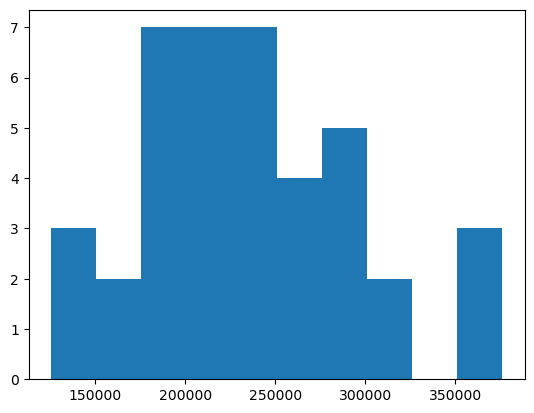

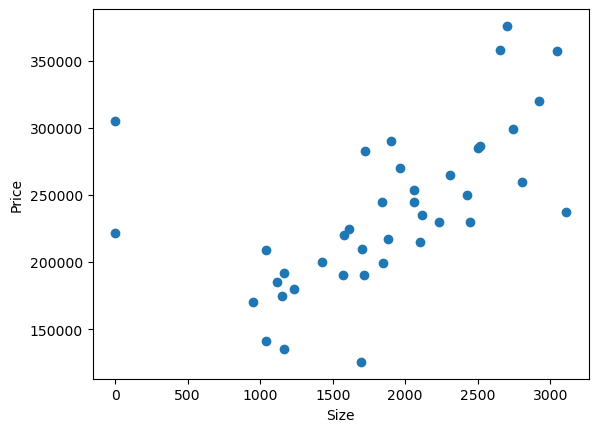

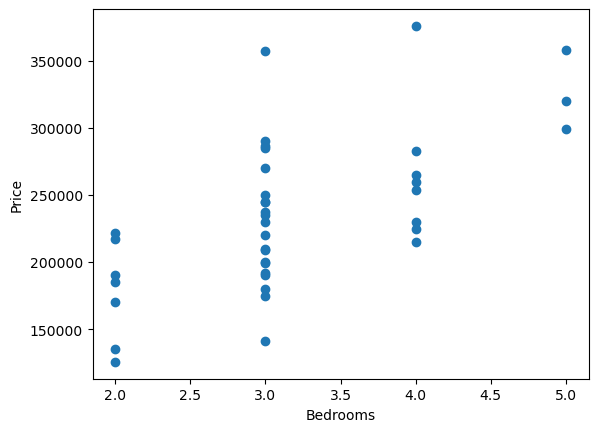

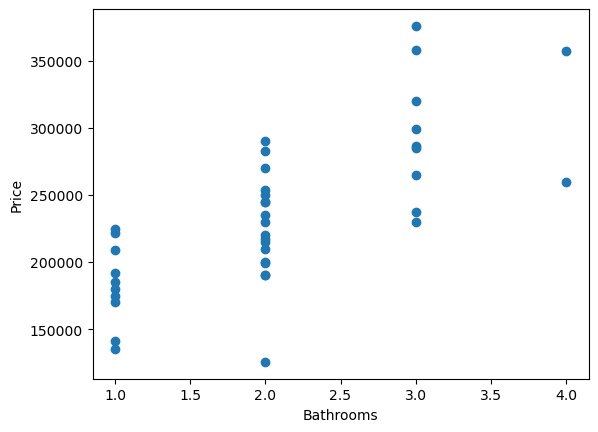

In [6]:
# Data exploration and visualization
plt.hist(data['Property price (USD)'])
plt.show()

plt.scatter(data['Living Area'], data['Property price (USD)'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

plt.scatter(data['Bedrooms'], data['Property price (USD)'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

plt.scatter(data['Bathrooms'], data['Property price (USD)'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [7]:
#Drop NA row and assign variables
data = data.drop(labels=39, axis=0)
X = data[['Living Area', 'Bedrooms', 'Bathrooms']]
y = data['Property price (USD)']
y = np.array(y).reshape(-1, 1)


In [8]:
#Split the data into training and testing
#Scale the values for best results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_Y.fit_transform(y_train)
X_test = scaler_X.transform(X_test)
y_test = scaler_Y.transform(y_test)


In [9]:
#Neural Network Architecture
model = Sequential()
model.add(Dense(128, input_dim=3, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(1, activation='linear'))

In [10]:
#Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [11]:
#Fit the model and run 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

mse_train = model.evaluate(X_train, y_train)[1]
mse_test = model.evaluate(X_test, y_test)[1]
print('Training MSE:', mse_train)
print('Testing MSE:', mse_test)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 2/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 4/100
1/1 [==============================] - 0s 55ms/step - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.1137 - val_mean_squared_error: 0.1137
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0784 - val_mean_squared_error: 0.0784
Epoch 7/100
1/1 [=========================

In [12]:
#House prediction
new_house = [[2000,2,1]]
new_house = scaler_X.transform(new_house)
predicted_price = model.predict(new_house)
predicted_price = scaler_Y.inverse_transform(predicted_price)
print('Predicted price for new house: ', predicted_price)

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 181ms/step
Predicted price for new house:  [[192354.14]]
